Dla każdego szlaku sygnałowego/metabolicznego w bazie danych podać leki, które wchodzą z nim w interakcje. Wyniki należy przedstawić w postaci ramki danych jak i w opracowanej przez siebie formie graficznej. Przykładem takiej grafiki może być graf dwudzielny, gdzie dwa rodzaje wierzchołków to szlaki sygnałowe i leki, a poszczególne krawędzie reprezentują interakcję danego leku z danym szlakiem sygnałowym. Należy zadbać o czytelność i atrakcyjność prezentacji graficznej.

In [70]:
import pandas as pd
import lxml
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

In [71]:
path = 'data/drugbank_partial.xml'
ns = {'db': 'http://www.drugbank.ca'}

In [72]:
tree = ET.parse(path)
root = tree.getroot()

In [83]:
def unwrap(field, node: ET.Element):
    return getattr(node.find(f"db:{field}", ns), "text", None)

In [86]:
def pathways_df():
    data = []
    for pathway in root.findall('db:drug/db:pathways/db:pathway', ns):
        drugs = [drug_name.text for drug_name in pathway.findall('db:drugs/db:drug/db:name', ns)]
        pathway_name = unwrap("name", pathway)
        data.append({
            "Pathway": pathway_name,
            "Drugs": drugs,
        })
    
    return pd.DataFrame(data)

In [100]:
df = pathways_df()
df

,Pathway,Drugs
0,Lepirudin Action Pathway,"[Lepirudin, Phylloquinone, Calcium]"
1,Cetuximab Action Pathway,[Cetuximab]
2,Bivalirudin Action Pathway,"[Bivalirudin, Phylloquinone, Calcium]"
3,Alteplase Action Pathway,"[Alteplase, Phylloquinone, Calcium]"
4,Urokinase Action Pathway,"[Urokinase, Phylloquinone, Calcium]"
5,Reteplase Action Pathway,"[Reteplase, Phylloquinone, Calcium]"
6,Anistreplase Action Pathway,"[Anistreplase, Phylloquinone, Calcium]"
7,Tenecteplase Action Pathway,"[Tenecteplase, Phylloquinone, Calcium]"
8,Abciximab Action Pathway,[Abciximab]
9,Eptifibatide Action Pathway,[Eptifibatide]


In [106]:
def pathways_graph():
    graph = nx.Graph()
    bottom = []
    
    for pathway in root.findall('db:drug/db:pathways/db:pathway', ns):
        pathway_name = unwrap("name", pathway)
        for drug in pathway.findall('db:drugs/db:drug', ns):
            drug_name = unwrap("name", drug)
            graph.add_edge(pathway_name, drug_name)
            bottom.append(drug_name)
    
    pos = nx.bipartite_layout(graph, bottom)
    plt.figure(figsize=(10, 10))
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=1000, 
        font_size=8,
        node_color="#dddddd",
        edge_color="#aaaaaa",
    )
    plt.show()
    

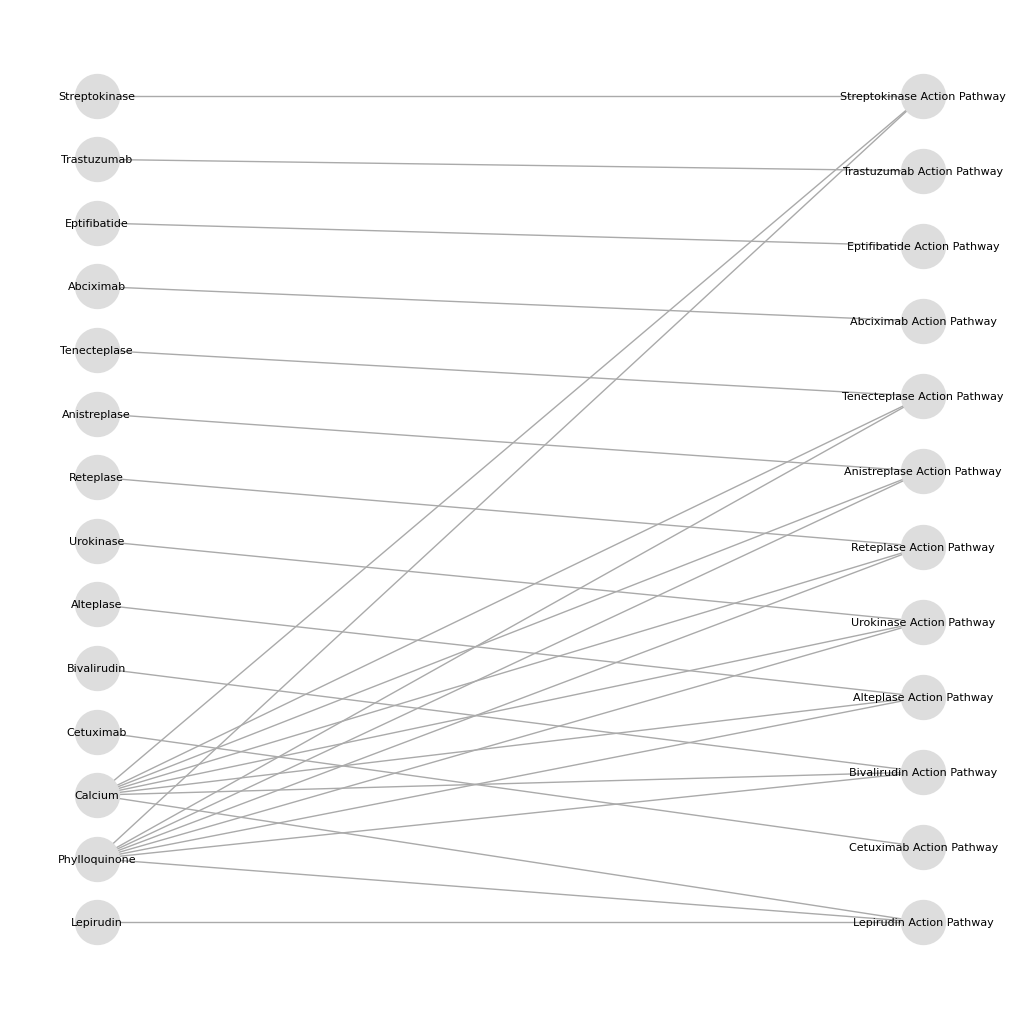

In [107]:
pathways_graph()